# download the dataset (train and test files)

In [1]:
!wget http://ps2.railsreactor.net/datasets/power_consumption/household_power_consumption.csv -O household_power_consumption.csv -o wget.log

# load and concatenate those datasets via pandas

In [2]:
# vizualizing
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import seaborn as sns
import numpy as np

full_data = pd.read_csv('household_power_consumption.csv').reset_index().drop(["index"], axis=1)

full_data['Global_active_power'] = full_data['Global_active_power'].astype('str').replace({'?':None}).astype(float)
full_data['Global_reactive_power'] = full_data['Global_reactive_power'].astype('str').replace({'?':None}).astype(float)
full_data['Voltage'] = full_data['Voltage'].astype('str').replace({'?':None}).astype(float)
full_data['Global_intensity'] = full_data['Global_intensity'].astype('str').replace({'?':None}).astype(float)
full_data['Sub_metering_1'] = full_data['Sub_metering_1'].astype('str').replace({'?':None}).astype(float)
full_data['Sub_metering_2'] = full_data['Sub_metering_2'].astype('str').replace({'?':None}).astype(float)

/Users/kyrylo_kundik/PycharmProjects/summer-19/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# print the dataset size and first rows from the dataset

In [3]:
full_data.head(15)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


In [4]:
full_data.shape

(2075259, 9)

In [5]:
full_data.size

18677331

# print number of rows with missing values, analyze which columns have the biggest number of missing values

In [6]:
full_data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
full_data.interpolate(inplace=True)

# analyze values distribution for each column (except Time and Date)

In [8]:
full_data.describe(include='all')

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
unique,1442,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,11/2/2007,21:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1440,1442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.090280e+00,1.236492e-01,2.408328e+02,4.621481e+00,1.109485e+00,1.289229e+00,6.442386e+00
std,NaN,NaN,1.052628e+00,1.124194e-01,3.237763e+00,4.424361e+00,6.115843e+00,5.786613e+00,8.415860e+00
min,NaN,NaN,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,3.100000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,6.140000e-01,1.000000e-01,2.410000e+02,2.751585e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,NaN,NaN,1.528000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01


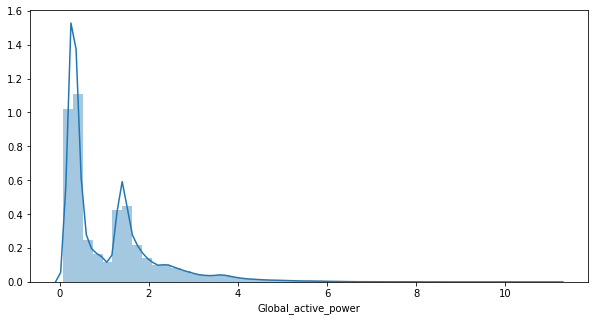

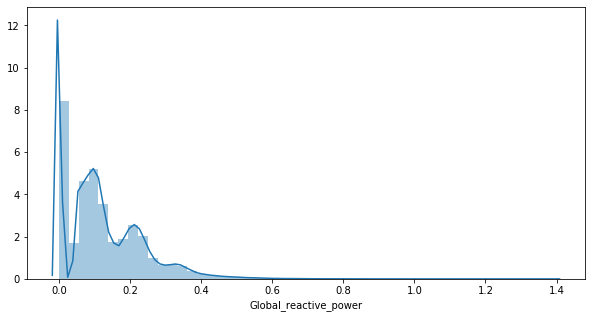

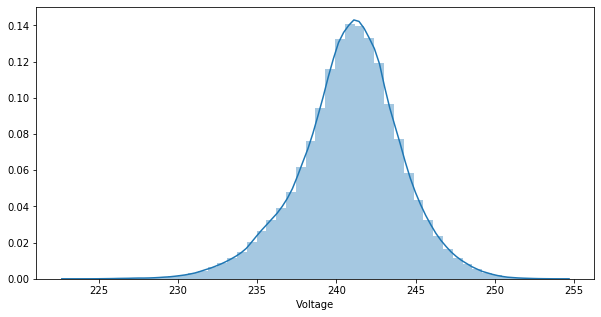

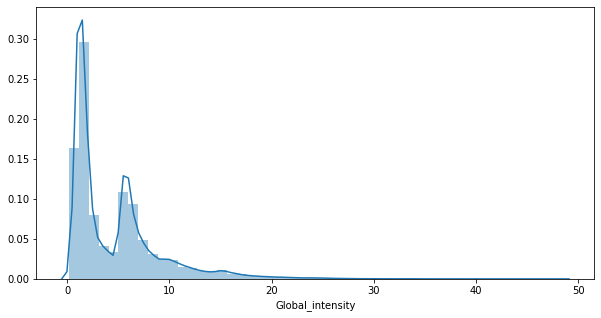

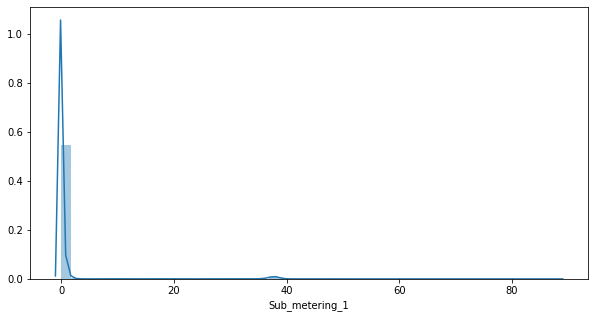

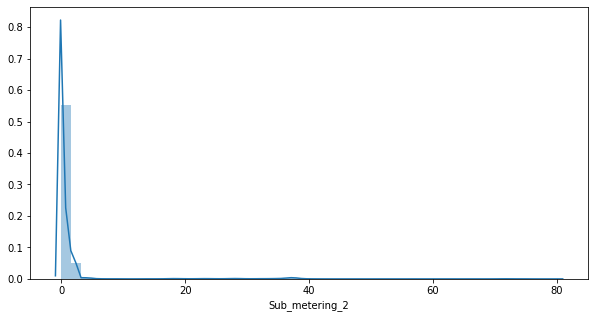

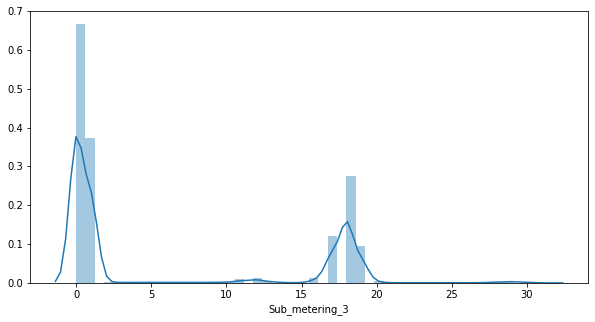

In [9]:
for col in full_data.columns[2:]:
    plt.figure(figsize=(10, 5))
    sns.distplot(full_data[col])

# analyze the change in daily average Global_active_power. is there any seasonal behaviour? did consumption change with years?

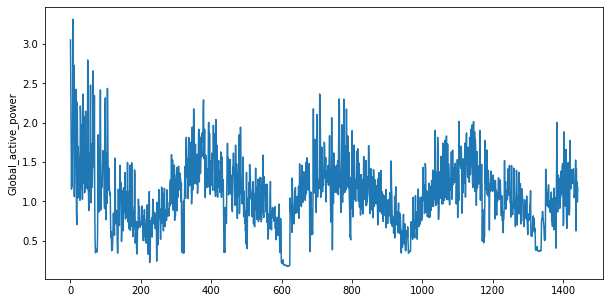

In [10]:
daily = full_data.drop(columns=['Time']).groupby('Date', sort=False).aggregate(np.mean)

plt.figure(figsize=(10, 5))
sns.lineplot(data=daily, x=np.arange(daily['Global_active_power'].size), y='Global_active_power')

# for 2 selected dates (2008-02-01 and 2008-02-02) plot the following variables with respect to time:

In [11]:
time_interval = full_data[(full_data['Date'] == '1/2/2008') | (full_data['Date'] == '2/2/2008')]
time_interval.set_index(np.arange(time_interval['Time'].size), inplace=True)
time_interval.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/2/2008,00:00:00,2.268,0.184,239.79,9.4,0.0,0.0,18.0
1,1/2/2008,00:01:00,2.210,0.188,240.70,9.2,0.0,0.0,17.0
2,1/2/2008,00:02:00,2.270,0.184,239.96,9.4,0.0,0.0,18.0
3,1/2/2008,00:03:00,2.238,0.182,239.63,9.4,0.0,0.0,18.0
4,1/2/2008,00:04:00,2.204,0.184,240.11,9.2,0.0,0.0,17.0


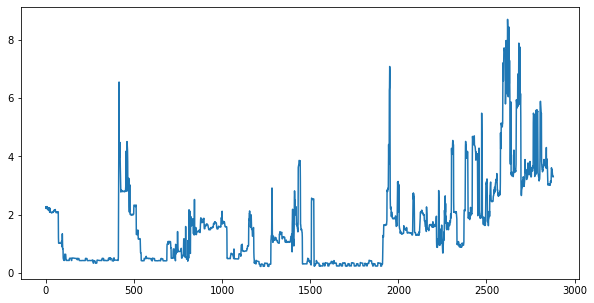

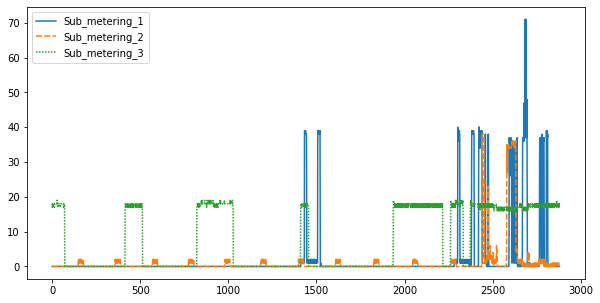

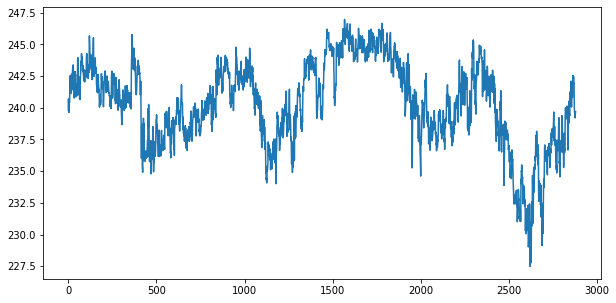

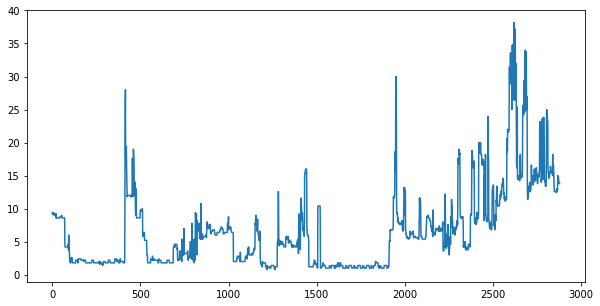

In [12]:
cols = ['Global_active_power', ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], 'Voltage', 'Global_intensity']

for col in cols:
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=time_interval[col])

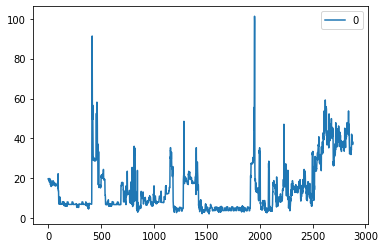

In [13]:
active_energy_consumed = pd.DataFrame(time_interval['Global_active_power'] * 1000 / 60 - time_interval['Sub_metering_1'] - time_interval['Sub_metering_2'] - time_interval['Sub_metering_3'], np.arange(time_interval.shape[0]))
sns.lineplot(data=active_energy_consumed)

# detect dates with abnormal voltage or current if any

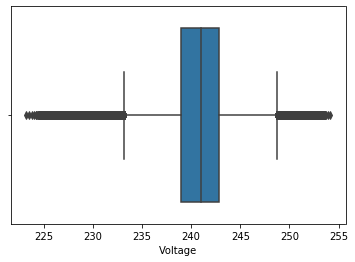

In [14]:
sns.boxplot(x=full_data['Voltage'])

In [15]:
vol = full_data['Voltage']

Q1 = vol.quantile(q=0.25)
Q3 = vol.quantile(q=0.75)
IQR = Q3 - Q1

outliers = (vol < (Q1 - 1.5 * IQR)) | (vol > (Q3 + 1.5 * IQR))
outliers[outliers == True].size

52195

# analyze correlation between columns

In [16]:
corr = full_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1,0.245047,-0.395522,0.998887,0.483816,0.433892,0.639272
Global_reactive_power,0.245047,1,-0.10903,0.264162,0.122743,0.139204,0.087743
Voltage,-0.395522,-0.10903,1,-0.407198,-0.1941,-0.165348,-0.26551
Global_intensity,0.998887,0.264162,-0.407198,1,0.488756,0.439713,0.627264
Sub_metering_1,0.483816,0.122743,-0.1941,0.488756,1,0.0550106,0.102704
Sub_metering_2,0.433892,0.139204,-0.165348,0.439713,0.0550106,1,0.0807104
Sub_metering_3,0.639272,0.087743,-0.26551,0.627264,0.102704,0.0807104,1


# perform preprocessing for the dataset by using any of the methods from lecture 4. the result of this step must be a dataset (X and y) that can be used for modelling

In [17]:
def get_xy(df, target="target"):
    return df.drop(target, axis=1), df[target]

In [18]:
X, y = get_xy(full_data, target='Global_active_power')

for col in X.columns[2:]:
    X[col] = X[col].astype(np.float32)
    X[col].fillna(X[col].median(), inplace=True)

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

numeric_cols = X.columns[2:]
X[numeric_cols] = standard_scaler.fit_transform(X[numeric_cols])

In [19]:
X.describe(include='all')

,Date,Time,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
unique,1442,1440,NaN,NaN,NaN,NaN,NaN,NaN
top,11/2/2007,21:01:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1440,1442,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-6.486189e-17,2.485815e-15,-1.448984e-17,-1.862588e-17,-2.276192e-17,1.270668e-16
std,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,NaN,NaN,-1.099893e+00,-5.445979e+00,-9.993494e-01,-1.814116e-01,-2.227952e-01,-7.655055e-01
25%,NaN,NaN,-6.729200e-01,-5.691521e-01,-7.281238e-01,-1.814116e-01,-2.227952e-01,-7.655055e-01
50%,NaN,NaN,-2.103662e-01,5.164530e-02,-4.226367e-01,-1.814116e-01,-2.227952e-01,-6.466822e-01
75%,NaN,NaN,6.257888e-01,6.292031e-01,4.019833e-01,-1.814116e-01,-4.998248e-02,1.254491e+00


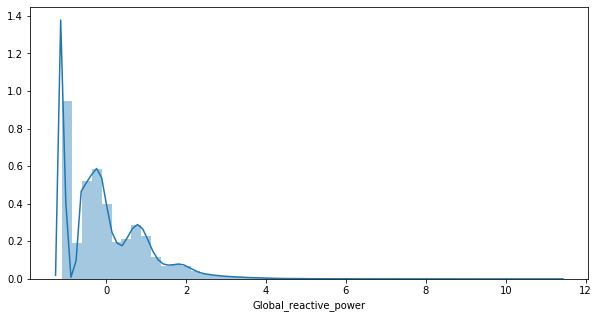

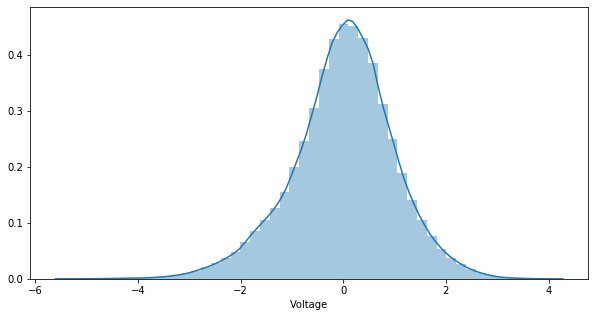

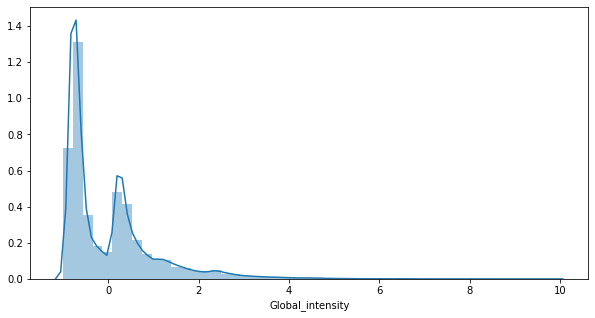

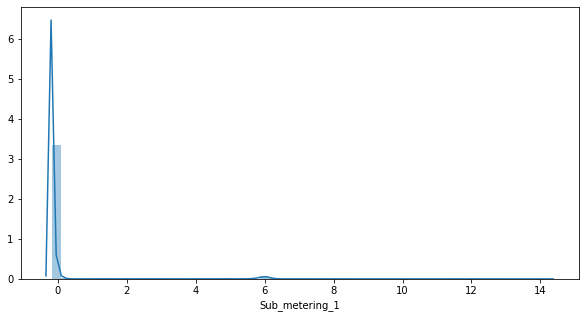

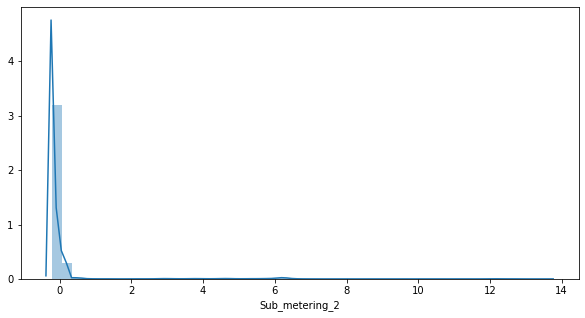

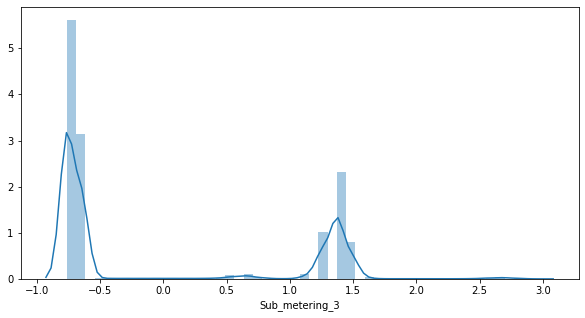

In [20]:
for col in X.columns[2:]:
    plt.figure(figsize=(10, 5))
    sns.distplot(X[col])

# generate automatic report for the dataset via pandas_profiling library

In [21]:
import pandas_profiling

def get_profiling(df, output_name):
    profile = pandas_profiling.ProfileReport(df=df)
    profile.to_file(output_name)

In [22]:
get_profiling(full_data, "household_el_power.html")